In [38]:
from utils import *
from model import *
from dataset import *

In [39]:
file_path = r'./TCN4Flare_agn_data/'
sub_path = 'ztf_agns/'
data_path = r'./TCN4Flare_agn_data/dataset/'

In [40]:
test_dataset = dataset(file_path, sub_path, data_path)
zg_raw_dataset, zg_raw_agn_params, zg_empty_files = test_dataset.extract_data('zg')
zr_raw_dataset, zr_raw_agn_params, zr_empty_files = test_dataset.extract_data('zr')

print(zg_raw_dataset.shape)
print(zg_raw_agn_params.shape)
print(len(zg_empty_files))

print(zr_raw_dataset.shape)
print(zr_raw_agn_params.shape)
print(len(zr_empty_files))

ValueError: max() arg is an empty sequence

In [ ]:
zg_fit_dataset, zg_fit_agn_params, zg_fail_agns = test_dataset.GP_fit_raw_dataset('zg', zg_raw_dataset, zg_raw_agn_params)
zr_fit_dataset, zr_fit_agn_params, zr_fail_agns = test_dataset.GP_fit_raw_dataset('zr', zr_raw_dataset, zr_raw_agn_params)

print(zg_fit_dataset.shape)
print(zg_fit_agn_params.shape)
print(zg_fail_agns.shape)

print(zr_fit_dataset.shape)
print(zr_fit_agn_params.shape)
print(zr_fail_agns.shape)

(212, 2167, 3)
(212, 5)
(0,)


In [7]:
TCN_model = TCN_model(model_path=r'./model/', model_name='TCN4Flare_128_3_256_1_0.2_9:1.keras')

2025-05-06 16:47:17.245038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-06 16:47:17.298573: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-06 16:47:17.299059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 tcn (TCN)                   (None, 128)               843648    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 843,777
Trainable params: 843,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# test predict method
zg_y_pred, zg_y_prob = TCN_model.predict(zg_fit_dataset)
zg_flare_idx = np.where(zg_y_pred == 1)[0]
zr_y_pred, zr_y_prob = TCN_model.predict(zr_fit_dataset)
zr_flare_idx = np.where(zr_y_pred == 1)[0]

      1/Unknown - 0s 175ms/step

2025-05-06 16:49:03.410501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


212/212 [==============================] - 6s 25ms/step


In [ ]:
print(len(zg_flare_idx), len(zr_flare_idx))
zg_agn_with_flares_params = zg_fit_agn_params[zg_flare_idx]
zr_agn_with_flares_params = zr_fit_agn_params[zr_flare_idx]

agn_with_flares_params = np.concatenate(zg_agn_with_flares_params, zr_agn_with_flares_params)
agn_with_flares_params = np.unique(agn_with_flares_params, axis=0)

print(len(agn_with_flares_params))

4


array([['2EG J0744+5438', '115.6657006', '54.7401312',
        '5.60083573934161', '2.3358312895042657'],
       ['2MASX J11005099+5135026', '165.2126235', '51.5839876',
        '3.5968873291422843', '2.5675348963804927'],
       ['2EG J0852-1237', '132.5400997', '-12.2264755',
        '4.776018805578609', '1.4679783445083305'],
       ['1AXG J233253+1513', '353.2269474', '15.2182397',
        '3.346767763969245', '3.0720928806269234']], dtype='<U32')

2EG J0744+5438
2MASX J11005099+5135026
2EG J0852-1237
1AXG J233253+1513


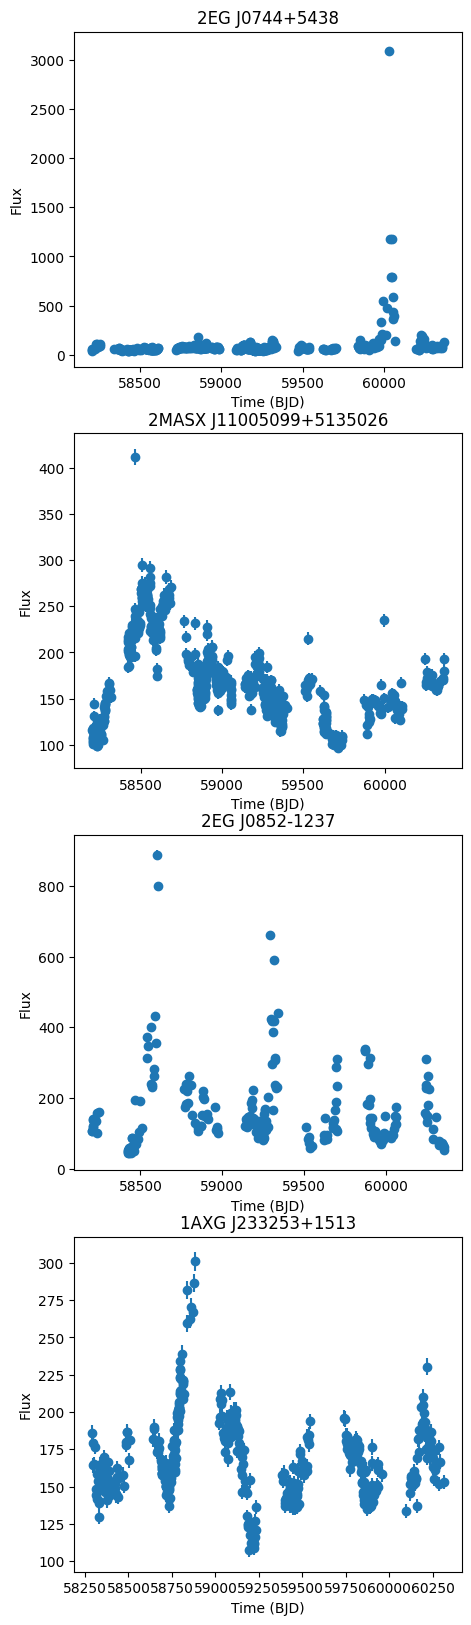

In [ ]:
plt.figure(figsize=(12, 5*len(flare_idx)))
for i, idx in enumerate(flare_idx):
    agn_names = fit_agn_params[idx, 0]
    print(agn_names)
    flare_data = raw_dataset[np.where(raw_agn_params[:,0]==agn_names)[0], :, :].squeeze()
    t = flare_data[:,0]
    flux = flare_data[:,1]
    flux_err = flare_data[:,2]

    t = t[~np.isnan(t)]
    flux = flux[~np.isnan(flux)]
    flux_err = flux_err[~np.isnan(flux_err)]

    plt.subplot(len(flare_idx), 1, i+1)
    plt.errorbar(t, flux, yerr=flux_err, fmt='o')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')
    plt.title(agn_names)
